In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

# import pandas
import pandas as pd

# import train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


# Previsão da Pedra-conceito

In [2]:
data = pd.read_csv("../data/df_pooled_common.csv")
data.head()


,nome,ida,diff_fase,ponto_virada_encoded,anos_pm,bolsista_encoded,ipv,corraca,ponto_virada,ian,...,ips,ieg,ipp,idade,sexo_encoded,fase,inde,sexo,na_fase,ano
0,ALUNO-1,7.000000,0.0,0,2.0,0,7.750000,R,Não,10.0,...,7.500,8.7,5.9375,11.0,1.0,2,7.883752,F,1,2020
1,ALUNO-3,5.500000,0.0,0,2.0,0,8.111113,B,Não,10.0,...,7.500,8.9,8.1250,12.0,1.0,3,7.856390,F,1,2020
2,ALUNO-4,0.000000,-1.0,0,2.0,0,7.750000,R,Não,5.0,...,6.875,4.1,7.1875,10.0,0.0,1,5.076252,M,0,2020
3,ALUNO-5,7.500000,0.0,0,1.0,0,8.166665,R,Não,10.0,...,7.500,8.0,8.4375,10.0,0.0,2,8.077085,M,1,2020
4,ALUNO-8,7.333333,0.0,1,3.0,1,8.944450,R,Sim,10.0,...,4.375,9.9,8.7500,14.0,1.0,4,8.381391,F,1,2020


In [3]:
data.dtypes


nome                     object
ida                     float64
diff_fase               float64
ponto_virada_encoded      int64
anos_pm                 float64
bolsista_encoded          int64
ipv                     float64
corraca                  object
ponto_virada             object
ian                     float64
pedra                    object
pedra_encoded             int64
iaa                     float64
ips                     float64
ieg                     float64
ipp                     float64
idade                   float64
sexo_encoded            float64
fase                      int64
inde                    float64
sexo                     object
na_fase                   int64
ano                       int64
dtype: object

In [4]:
# converts 'ian' to category
data["ian"] = data["ian"].astype("category")

# converts 'sexo' to category
data["sexo"] = data["sexo"].astype("category")

# converts 'pedra' to category
data["pedra"] = data["pedra"].astype("category")

# converts 'ponto_virada' to category
data["ponto_virada"] = data["ponto_virada"].astype("category")

# converts 'fase' to category
data["fase"] = data["fase"].astype("category")

# converts 'na_fase' to boolean
data["na_fase"] = data["na_fase"].astype(bool)

# converts bolsista_encoded to boolean
data["bolsista_encoded"] = data["bolsista_encoded"].astype(bool)

# maps ano to t,t+1,t+2
data["ano"] = data["ano"].apply(
    lambda x: "t0" if x == 2020 else ("t1" if x == 2021 else "t2")
)
data["ano"] = data["ano"].astype("category")


In [5]:
data = data.drop(columns=["pedra_encoded", "nome", "corraca", "sexo_encoded"])
data.head()


,ida,diff_fase,ponto_virada_encoded,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,pedra,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano
0,7.000000,0.0,0,2.0,False,7.750000,Não,10.0,Ametista,8.50002,7.500,8.7,5.9375,11.0,2,7.883752,F,True,t0
1,5.500000,0.0,0,2.0,False,8.111113,Não,10.0,Ametista,7.91667,7.500,8.9,8.1250,12.0,3,7.856390,F,True,t0
2,0.000000,-1.0,0,2.0,False,7.750000,Não,5.0,Quartzo,8.00002,6.875,4.1,7.1875,10.0,1,5.076252,M,False,t0
3,7.500000,0.0,0,1.0,False,8.166665,Não,10.0,Ametista,7.50002,7.500,8.0,8.4375,10.0,2,8.077085,M,True,t0
4,7.333333,0.0,1,3.0,True,8.944450,Sim,10.0,Ametista,8.33334,4.375,9.9,8.7500,14.0,4,8.381391,F,True,t0


In [6]:
# Selecionar as variáveis preditoras e a variável alvo
# no lugar de eliminar o ano, será que daria para usar uma espécie de nota no ano t, nota no ano t+1, nota em t + 2?
X = data.drop(columns=["pedra", "inde"])

# features com importância
X = X[["ida", "ieg", "ipv", "ano", "iaa", "ian", "ipp", "ips", "na_fase"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, data["pedra"], test_size=0.25, random_state=41, shuffle=True
)


In [7]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [8]:
label = "pedra"
print("Summary of class variable: \n", train_data[label].describe())


Summary of class variable: 
 count         1688
unique           4
top       Ametista
freq           740
Name: pedra, dtype: object


In [9]:
print(X_train.describe())
print(y_train.describe())


               ida          ieg          ipv          iaa          ipp  \
count  1688.000000  1688.000000  1688.000000  1688.000000  1688.000000   
mean      5.967858     7.570527     7.370089     8.279019     7.012319   
std       2.389013     2.097586     1.333416     1.988906     1.388205   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.600000     6.400000     6.800000     7.916680     6.250000   
50%       6.333333     8.200000     7.500000     8.750010     7.343750   
75%       7.666667     9.200000     8.200000     9.500000     7.968750   
max      10.000000    10.000000    10.000010    10.000020    10.000000   

               ips  
count  1688.000000  
mean      6.825563  
std       1.310618  
min       0.000000  
25%       6.250000  
50%       7.500000  
75%       7.500000  
max      10.000000  
count         1688
unique           4
top       Ametista
freq           740
Name: pedra, dtype: object


In [10]:
save_path = "agModels-predictPedra"  # specifies folder to store trained models
predictor = TabularPredictor(
    label=label, path=save_path, problem_type="multiclass"
).fit(train_data, presets="good_quality", num_gpus=1)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          16
Memory Avail:       13.00 GB / 15.49 GB (83.9%)
Disk Space Avail:   914.20 GB / 1006.85 GB (90.8%)
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affecte

In [11]:
y_test = test_data[label]  # values to predict
test_data_nolab = X_test  # delete label column to prove we're not cheating
test_data_nolab.head()


,ida,ieg,ipv,ano,iaa,ian,ipp,ips,na_fase
272,5.750000,10.000000,5.916675,t0,9.00002,10.0,2.50000,7.500,True
15,7.000000,9.300000,7.944443,t0,8.50002,5.0,8.12500,6.875,False
1815,5.166667,9.136364,8.277780,t2,9.16668,10.0,7.96875,5.625,True
387,9.000000,8.200000,8.333335,t0,9.50002,10.0,7.50000,6.250,True
1363,5.800000,7.200000,5.400000,t1,8.80000,10.0,6.70000,5.600,True


In [12]:
print(predictor.feature_metadata)


('category', [])  : 2 | ['ano', 'ian']
('float', [])     : 6 | ['ida', 'ieg', 'ipv', 'iaa', 'ipp', ...]
('int', ['bool']) : 1 | ['na_fase']


In [13]:
# predictor = TabularPredictor.load(
#     save_path
# )  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(
    y_true=y_test, y_pred=y_pred, auxiliary_metrics=True
)


Predictions:  
 272        Ágata
15      Ametista
1815    Ametista
387     Ametista
1363       Ágata
          ...   
556     Ametista
491        Ágata
109      Quartzo
1121     Topázio
1976     Quartzo
Name: pedra, Length: 563, dtype: object


In [14]:
print(perf)


{'accuracy': 0.9449378330373002, 'balanced_accuracy': 0.9592075080590463, 'mcc': 0.9241074429555529}


In [15]:
results = predictor.fit_summary(show_plot=True)


*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         NeuralNetFastAI_BAG_L2   0.970972    accuracy       1.744584  207.680156                0.157925          30.419940            2      False         13
1            WeightedEnsemble_L3   0.970972    accuracy       1.746386  208.058417                0.001801           0.378260            3      False         24
2                LightGBM_BAG_L2   0.969787    accuracy       1.634749  181.363533                0.048089           4.103317            2      False         15
3                 XGBoost_BAG_L2   0.968009    accuracy       1.668539  195.043430                0.081880          17.783213            2      False         21
4                CatBoost_BAG_L2   0.966825    accuracy       1.656547  244.071683                0.069887          66.811466        

gio: file:///home/alien-wsl/projects/datathon_app/datathonapp/notebooks/agModels-predictPedraSummaryOfModels.html: Failed to find default application for content type ‘text/html’


In [16]:
predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 9 features using 563 rows with 5 shuffle sets...
	62.97s	= Expected runtime (12.59s per shuffle set)
	9.45s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
ida,0.343517,0.012344,1.997571e-07,5,0.368934,0.318100
ieg,0.284192,0.018798,2.283538e-06,5,0.322896,0.245487
ipv,0.141741,0.012203,6.527905e-06,5,0.166867,0.116615
ano,0.104796,0.011373,1.638895e-05,5,0.128213,0.081378
ian,0.090586,0.006526,3.210469e-06,5,0.104024,0.077149
iaa,0.076732,0.013197,1.009690e-04,5,0.103904,0.049560
ipp,0.066785,0.008756,3.465408e-05,5,0.084813,0.048757
ips,0.045471,0.009532,2.187653e-04,5,0.065097,0.025844
na_fase,0.025933,0.007701,8.330390e-04,5,0.041790,0.010075


In [17]:
features_importance = predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 9 features using 563 rows with 5 shuffle sets...
	61.62s	= Expected runtime (12.32s per shuffle set)
	9.82s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [18]:
important_features = features_importance[features_importance < 0.05].index.to_list()
print(important_features)


['ida', 'ieg', 'ipv', 'ano', 'ian', 'iaa', 'ipp', 'ips', 'na_fase']


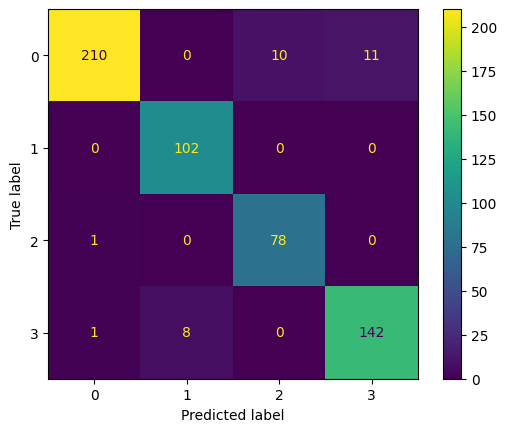

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()


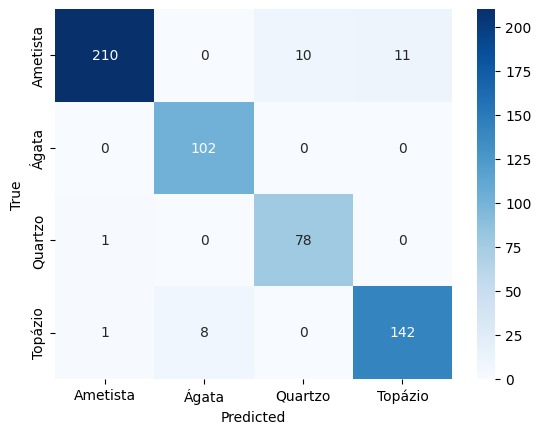

In [29]:
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)

# Get the unique labels from y_test
labels = y_test.value_counts().index

sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [25]:
y_pred.value_counts()


pedra
Ametista    212
Ágata       153
Quartzo     110
Topázio      88
Name: count, dtype: int64

In [27]:
y_test.value_counts()


pedra
Ametista    231
Ágata       151
Quartzo     102
Topázio      79
Name: count, dtype: int64